<a href="https://colab.research.google.com/github/BankNatchapol/CPE463-Image-Processing/blob/main/CPE463_morphology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline

from skimage import io
import pandas as pd

Original : (915, 1600, 3)


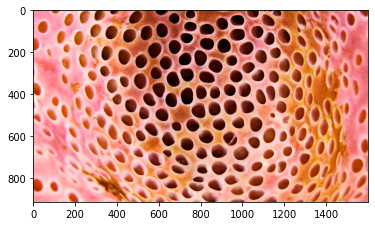

In [2]:
image = io.imread('https://www.futurity.org/wp/wp-content/uploads/2018/01/sponge-holes-trypophobia_1600.jpg')

print("Original :", image.shape)
plt.imshow(image)
plt.show()

# **Preprocessing**

rgb to hsv 

In [3]:
import colorsys
def rgb2hsv(image):
  hsv_image = np.zeros_like(image).astype(float)

  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
     hsv_image[i,j] = colorsys.rgb_to_hsv(*image[i,j])

  return hsv_image

In [4]:
hsv_image = rgb2hsv(image)

using power law for enhancing image

In [5]:
def scalingMinMax(x):
  # scaling data into range of 0-1 
  return list(map(lambda a: (a-min(x))/(max(x)-min(x)), x))

def calGammaTable(gamma, constant=1):
  # crate mapping list
  g = list(map(lambda x:constant*x**gamma, range(0, 256)))
  return scalingMinMax(g)

def powerLaw(image, gamma, constant = 1.0):
  #apply power law 
  gamma_table = calGammaTable(gamma, constant)
  f = lambda x: gamma_table[int(x)]
  func = np.vectorize(f)
  return func(image)*255

In [6]:
phsv_image = powerLaw(hsv_image[:,:,2].astype(int), gamma=0.2)
bi_image = ((255-phsv_image)>30).astype(int)

Binary image : (915, 1600)


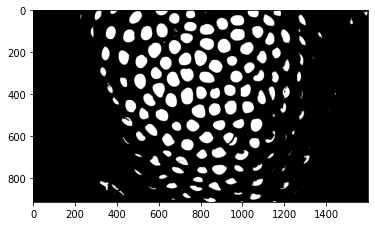

In [7]:
print("Binary image :", bi_image.shape)
plt.imshow(bi_image, cmap="gray")
plt.show()

# **Closing**

In [8]:
from scipy.ndimage.morphology import binary_dilation, binary_erosion
def closing(image, d=1, e=1):
  closed_image = image.copy()
  for _ in range(d):
    closed_image = binary_dilation(closed_image)
  for _ in range(e):
    closed_image = binary_erosion(closed_image) 
  return closed_image

In [9]:
closed_image = closing(bi_image, d=6, e=6).astype(int)

Closed image : (915, 1600, 3)


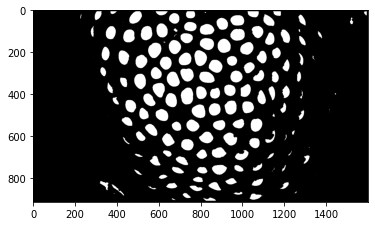

In [10]:
print("Closed image :", hsv_image.shape)
plt.imshow(closed_image, cmap="gray")
plt.show()

In [11]:
from skimage.segmentation import flood_fill
import random

def floodMap(test_fill):
  temp = np.zeros_like(image)
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      temp[i,j] = colors[test_fill[i,j]]
  return temp

num_color = 100
colors = [[0,0,0],[255,255,255]] + [[random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)] for i in range(num_color - 2)]

In [12]:
test_fill = closed_image.copy()
for i in range(closed_image.shape[0]):
  for j in range(closed_image.shape[1]):
    if test_fill[i,j] == 1:
      rand = random.randint(2, num_color - 1)
      test_fill = flood_fill(test_fill, (i, j), rand)

In [13]:
test_fill_mapped = floodMap(test_fill)

Filled image : (915, 1600, 3)


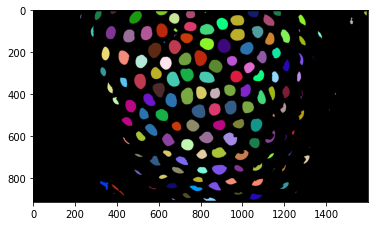

In [14]:
print("Filled image :", test_fill_mapped.shape)
plt.imshow(test_fill_mapped)
plt.show()

# **Hit-or-Miss transformation**

Original : (368, 604)


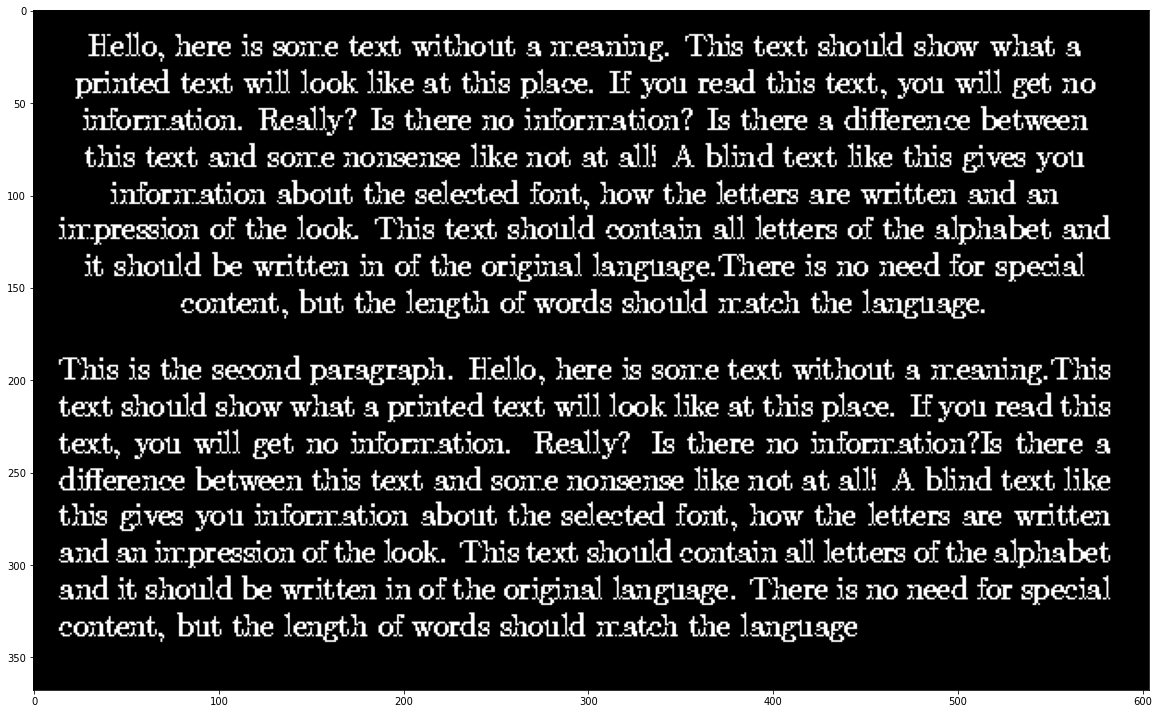

In [16]:
image = (io.imread('https://sharelatex-wiki-cdn-671420.c.cdn77.org/learn-scripts/images/0/08/TextAlignmentEx5.png', as_gray=True)*255 >50).astype(int)

print("Original :", image.shape)
plt.figure(figsize=(20, 20))
plt.imshow(image, cmap="gray")
plt.show()

In [17]:
se = image[17:25, 177:184]

Structuring element : (8, 7)


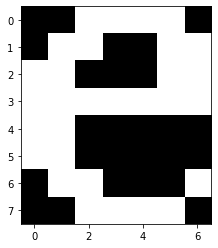

In [18]:
print("Structuring element :", se.shape)
plt.imshow(se, cmap="gray")
plt.show()

In [19]:
from scipy.ndimage.morphology import binary_hit_or_miss
hom_image = binary_hit_or_miss(image, se).astype(int)

hom_plot = hom_image.copy()
for _ in range(5):
  hom_plot = binary_dilation(hom_plot).astype(int)

names = ["Original", "Hit-or-Miss image"]
hom_images = [image, hom_plot]

In [20]:
import cv2
background = np.stack([image.astype(float) for _ in range(3)], axis=2 )
highlight = np.stack([hom_plot, np.zeros_like(hom_plot), np.zeros_like(hom_plot)], axis=2 )
added_image = cv2.addWeighted(background.astype(float),1.0,highlight.astype(float),0.5,0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Structuring element : (368, 604, 3)


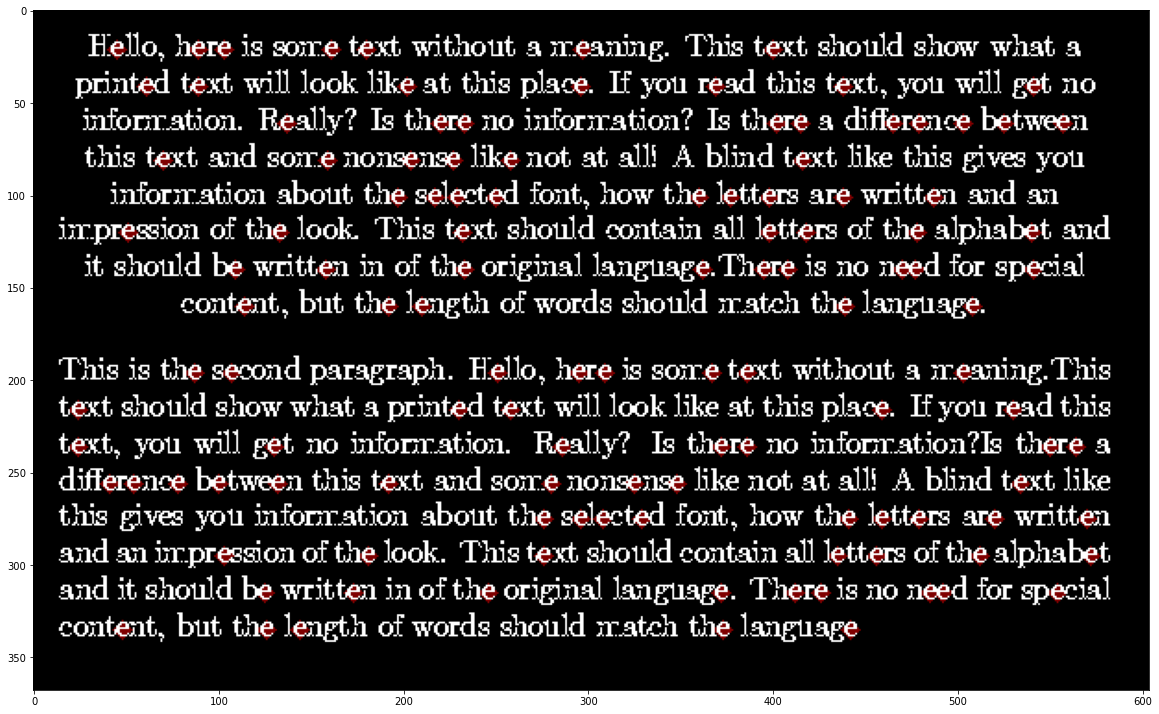

In [21]:
print("Structuring element :", added_image.shape)
plt.figure(figsize=(20,20))
plt.imshow(added_image, cmap="gray")
plt.show()

# **Broundary extraction**

Original : (383, 490)


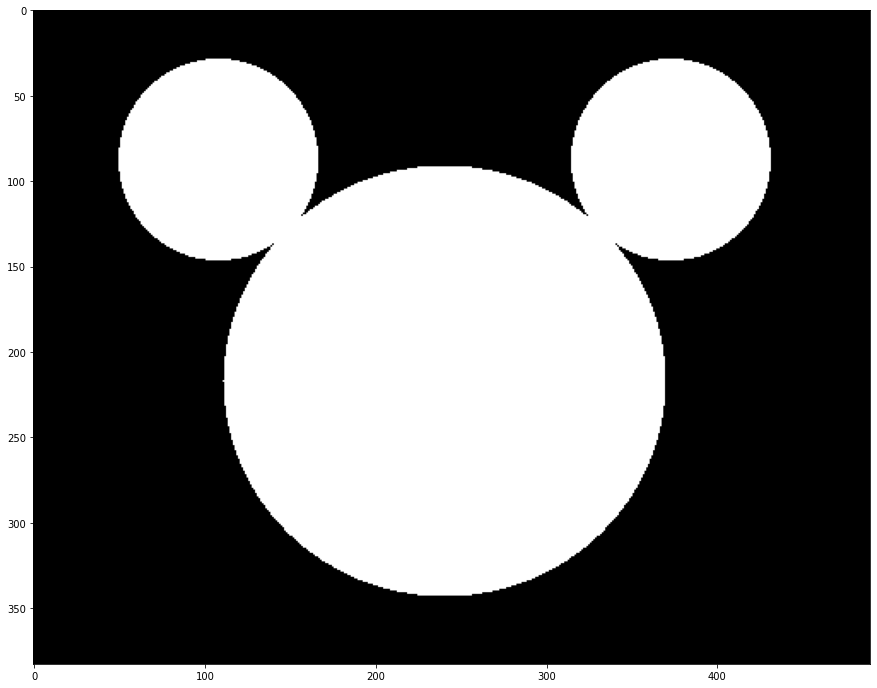

In [24]:
image = (io.imread('https://upload.wikimedia.org/wikipedia/commons/1/19/Binary_coins.png', as_gray=True)*255 >50).astype(int)

print("Original :", image.shape)
plt.figure(figsize=(15, 15))
plt.imshow(image, cmap="gray")
plt.show()

In [25]:
ero_image = image.copy()
for _ in range(1):
    ero_image = binary_erosion(ero_image) 

Original : (383, 490)


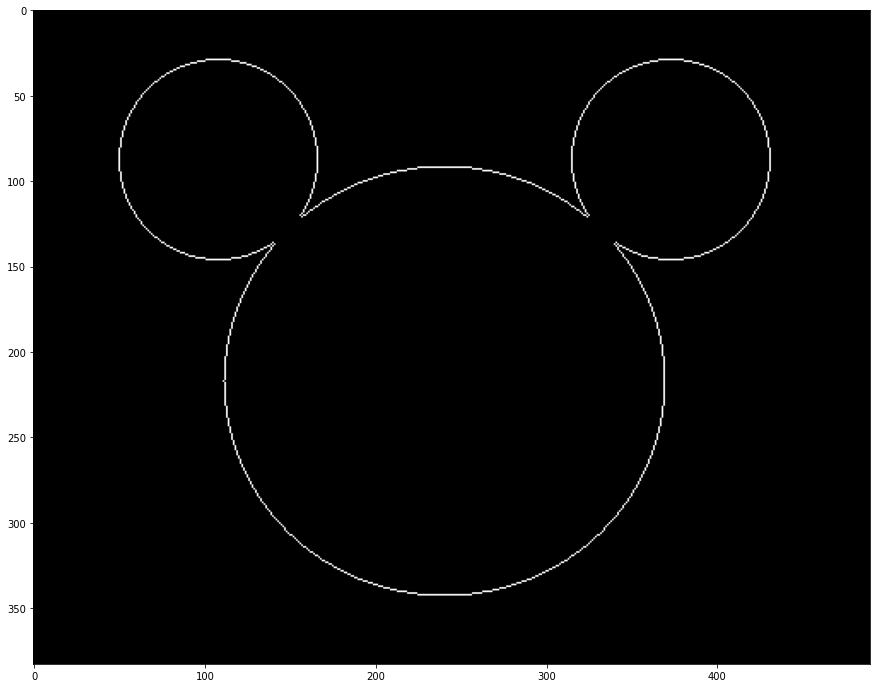

In [27]:
print("Original :", ero_image.shape)
plt.figure(figsize=(15, 15))
plt.imshow(image - ero_image, cmap="gray")
plt.show()